The data used in our study can be found on Jessen, Kelly and Pedersen's GitHub repository <br>
Link: https://github.com/bkelly-lab/ReplicationCrisis/tree/master/GlobalFactors

## First Look at the data

In [2]:
#Import
import pandas as pd
import numpy as np

from scipy import stats
from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

### Factor description
- abr_hxz: Abreviation used to name the characteristics from Hou, Xue, and Zhand (2020)
- abr_jkp: Abreviation used to name the characteristics from Jessen, Kelly and Perdersen

In [3]:
#Download & Display
desc_factor = pd.read_excel(r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Factor Details.xlsx")
desc_factor.head(2)

,abr_hxz,name,name_new,abr_jkp,time_to_create,lagged_denom,cite,variations,group,in-sample period,t-stat,p-value,direction,significance,controls
0,Sue,Earnings surprise,Standardized earnings surprise,niq_su,NaN,NaN,Foster Olsen and Shevlin (1984),3.0,Momentum,1974 - 1981,9.11,NaN,1.0,1.0,2.0
1,Abr,Cumulative abnormal stock returns around earni...,Cumulative abnormal stock returns around earni...,NaN,3,NaN,Chan Jegadeesh and Lakonishok (1996) 1972/1,3.0,Momentum,1977 - 1993,4.25,NaN,1.0,NaN,2.0


### Cluster defined by JKP

In [5]:
#Download the cluster associated to each of the 153 characteristics
cluster = pd.read_csv(r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Cluster Labels.csv")
print("Number of clusters:", len(cluster.cluster.unique()))
cluster.head()

Number of clusters: 13


,characteristic,cluster
0,age,Low Leverage
1,aliq_at,Investment
2,aliq_mat,Low Leverage
3,ami_126d,Size
4,at_be,Low Leverage


### Visualization of year of discovery
Generating a bar plot to visually depict the distribution of discovery years for the characteristics in our dataset. (*Figure 1 in the research paper*)

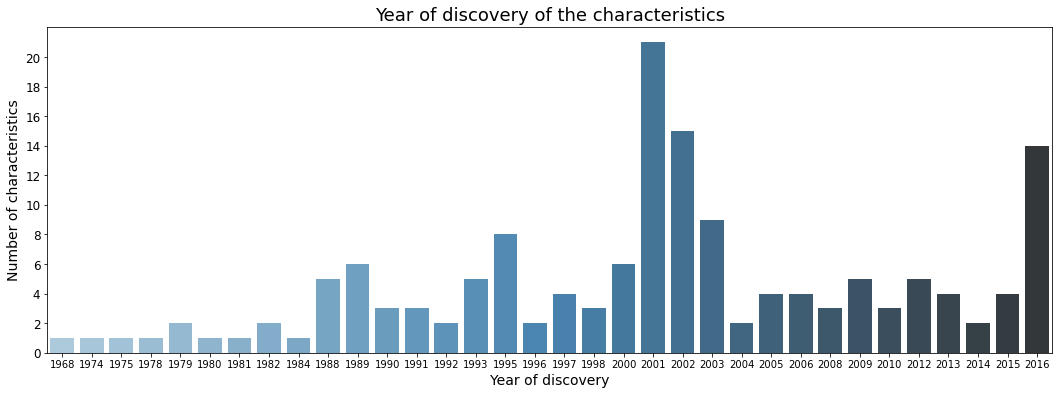

In [7]:
#Distribution of Discovery date
temp_factor = desc_factor[desc_factor["abr_jkp"].isin(cluster["characteristic"])]
y = [int(str(x).split("-")[-1]) for x in temp_factor["in-sample period"].values.tolist()]
y_df = pd.DataFrame(pd.DataFrame(y).value_counts())
y_df.columns = ["count"]
y_df = y_df.reset_index()
y_df.columns = ["year", "count"]
y_df.sort_values("year", ascending=True, inplace=True)

#Visualization
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Year of discovery of the characteristics", fontsize = 18)
sns.barplot(x="year", y="count", data=y_df,
            label="cluster", palette="Blues_d")

#Set axis
ax.set_ylabel("Number of characteristics", fontsize = 14)
ax.set_xlabel("Year of discovery", fontsize = 14)
ax.set_yticks(np.arange(0,22,2))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=12);

In [8]:
#Mean of Discovery
print("Mean Year of Discovery: ", int(pd.DataFrame(y).mean().values[0]))
#Median of Discovery
print("Meadian Year of Disovery: ", int(pd.DataFrame(y).median().values[0]))

Mean Year of Discovery:  2000
Meadian Year of Disovery:  2001


### In-Sample Length Period
Generating a bar plot to visually depict the distribution of the in-sample period length for the characteristics in our dataset.

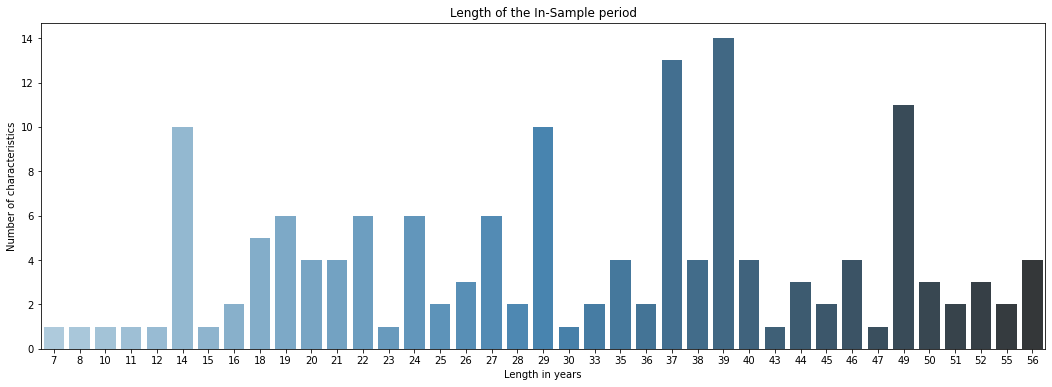

In [9]:
#In-sample period length
start = [(int(str(x).split("-")[0])) for x in temp_factor["in-sample period"].values.tolist()]
end = [(int(str(x).split("-")[-1])) for x in temp_factor["in-sample period"].values.tolist()]

#Adjust starting period to have dates after 1960
p = pd.DataFrame({"start": start, "end":end})
p.loc[p["start"]<1960, "start"] = 1960

y_df = pd.DataFrame(pd.DataFrame(p["end"]-p["start"]).value_counts())
y_df.columns = ["count"]
y_df = y_df.reset_index()
y_df.columns = ["length", "count"]
y_df.sort_values("length", ascending=True, inplace=True)

#Visualization
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Length of the In-Sample period")
ax = sns.barplot(x="length", y="count", data=y_df,
            label="cluster", palette="Blues_d")
ax.set(xlabel='Length in years', ylabel='Number of characteristics');

In [10]:
print("-----"*4)
print("In-Sample")
print("Mean length:", int(y_df["length"].mean()))
print("Median length:", int(y_df["length"].median()))
print("-----"*4)

--------------------
In-Sample
Mean length: 30
Median length: 29
--------------------


### Out-Saple Length
Generating a bar plot to visually depict the distribution of the out-sample period length for the characteristics in our dataset.

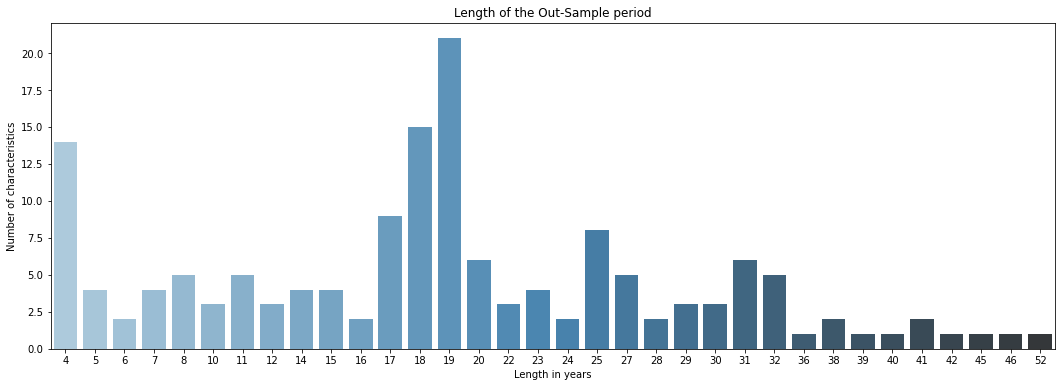

In [11]:
#In-sample period length
start = [(int(str(x).split("-")[1])) for x in temp_factor["in-sample period"].values.tolist()]
end = 2020
#Adjust starting period to have dates after 1960
p = pd.DataFrame({"start": start, "end":end})
p.loc[p["start"]<1960, "start"] = 1960

y_df = pd.DataFrame(pd.DataFrame(p["end"]-p["start"]).value_counts())
y_df.columns = ["count"]
y_df = y_df.reset_index()
y_df.columns = ["length", "count"]
y_df.sort_values("length", ascending=True, inplace=True)

#Visualization
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Length of the Out-Sample period")
ax = sns.barplot(x="length", y="count", data=y_df,
            label="cluster", palette="Blues_d")
ax.set(xlabel='Length in years', ylabel='Number of characteristics');

In [12]:
print("-----"*4)
print("Out-Sample")
print("Mean length:", int(y_df["length"].mean()))
print("Median length:", int(y_df["length"].median()))
print("-----"*4)

--------------------
Out-Sample
Mean length: 24
Median length: 23
--------------------


### Cluster Visualization
Creation of a barplot to understand the repartition the characteristics per cluster.

<AxesSubplot:title={'center':'Nb of characteristics per cluster'}, xlabel='count', ylabel='cluster'>

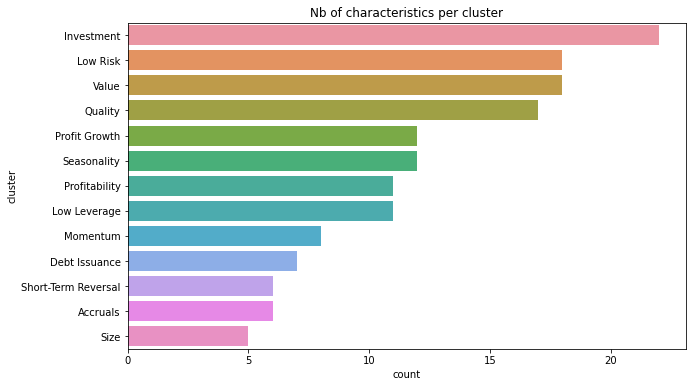

In [13]:
#Visualization
type_c = pd.DataFrame(cluster.cluster.value_counts()).reset_index()
type_c.columns = ["cluster", "count"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Nb of characteristics per cluster")
sns.barplot(x="count", y="cluster", data=type_c,
            label="cluster")

### Country Class
Table of the countries with their iso code, MSCI development classification and regions

In [14]:
#Download & Display
class_country = pd.read_excel(r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Country Classification.xlsx")
class_country.head()

,excntry,msci_development,region
0,USA,developed,north america
1,CHN,emerging,asia
2,JPN,developed,asia
3,HKG,developed,asia
4,GBR,developed,europe


### Zero cost portfolios
Zero-cost / Long-short portfolios. The portfolios are constructed as follows: the country’s stocks are ranked according to their score for a given characteristic (top or bottom percentile), then the zero-cost portfolio is built by going long (short) the top percentile and short (long) the bottom percentile as defined by the paper which first identified the characteristic. These portfolios were then re-balanced on a monthly basis according to characteristic ranking for each country.

In [15]:
#Download & Display
hml = pd.read_csv(r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\hml.csv")
hml.head()

,excntry,characteristic,eom,signal,n_stocks,n_stocks_min,ret_ew,ret_vw,ret_vw_cap
0,ARE,age,2006-02-28,228.0,56,1,0.132139,0.102877,0.097431
1,ARE,age,2006-03-31,228.0,57,1,-0.136900,-0.099525,-0.113379
2,ARE,age,2006-04-30,228.0,58,1,-0.172193,-0.208552,-0.191348
3,ARE,age,2006-05-31,228.0,62,1,-0.039481,-0.029230,-0.032885
4,ARE,age,2006-06-30,228.0,59,1,-0.048280,-0.069562,-0.062109


### Rank-weighted portfolios 
Rank-weighted (chracteristic managed) portfolios within mega, large, small, micro and nano cap stocks in the US.

In [16]:
#Download & Display
cmp = pd.read_csv(r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\cmp.csv")
cmp.head()

,excntry,characteristic,size_grp,eom,n_stocks,signal_weighted,ret_weighted
0,USA,age,micro,1986-02-28,2541,242.953127,-0.005127
1,USA,age,micro,1986-03-31,2548,242.565434,0.004314
2,USA,age,micro,1986-04-30,2649,239.178874,-0.012937
3,USA,age,micro,1986-05-31,2533,242.459497,0.002582
4,USA,age,nano,1986-06-30,1553,169.803020,0.023702


### Country by country
Let's look first at the US using the *Country Factor* folder from Jessen and Kelly. The folder is made of lms.csv in country-by-country files. 
- lms.csv: Long/short portfolios based on hml.csv but with the signing convention used in Jensen, Kelly and Pedersen (2022). In particular, they sign factors so they are consistent with the literature. For example, they go long low asset growth stocks and short high asset growth stocks, because the literature generally finds that low asset growth stocks outperform.

In [17]:
us_lms = pd.read_csv(r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Country Factors\USA.csv")
#Convert eom to datetime
us_lms["eom"] = pd.to_datetime(us_lms["eom"], format="%Y-%m-%d")
#Display
us_lms.head()

,characteristic,direction,excntry,eom,signal,n_stocks,n_stocks_min,ret_ew,ret_vw,ret_vw_cap
0,age,-1,USA,1926-03-31,-1.0,502,8,-0.066167,-0.098837,-0.086738
1,age,-1,USA,1926-04-30,-1.0,505,12,0.010546,-0.006303,-0.000572
2,age,-1,USA,1926-05-31,-2.0,510,17,-0.020292,-0.000190,-0.006332
3,age,-1,USA,1926-06-30,-2.0,512,21,-0.008927,-0.008323,-0.003012
4,age,-1,USA,1926-07-31,-2.0,503,23,0.017724,-0.004220,0.003211


### Correlation among groups & cluster
We will compare with the group (6) and the clusters (13)
- Look for the group of the characterisitics in *desc_factor* and *cluster*
- Compute the average of return for the group

In [20]:
"""
The groups are the ones defined in 
Hou, Xue, and Zhand (2020) paper
"""

i=0 #For creation of the df

#loop on charac in group
group_list =  desc_factor.group.unique()
for gr in group_list:
    charac_list = desc_factor[desc_factor.group == gr].abr_jkp.unique()
    #Only keep ew in a new dataframe
    temp_df = us_lms[us_lms["characteristic"].isin(charac_list)].groupby(["eom"]).mean()[["ret_ew"]]
    temp_df.columns = [str(gr)]
    #Check for df creation
    if i==0:
        i+=1
        group_df = temp_df
    else: #merge
        group_df = group_df.join(temp_df)

<ipython-input-21-bb822c8b7226>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(group_df.corr(), dtype=np.bool))


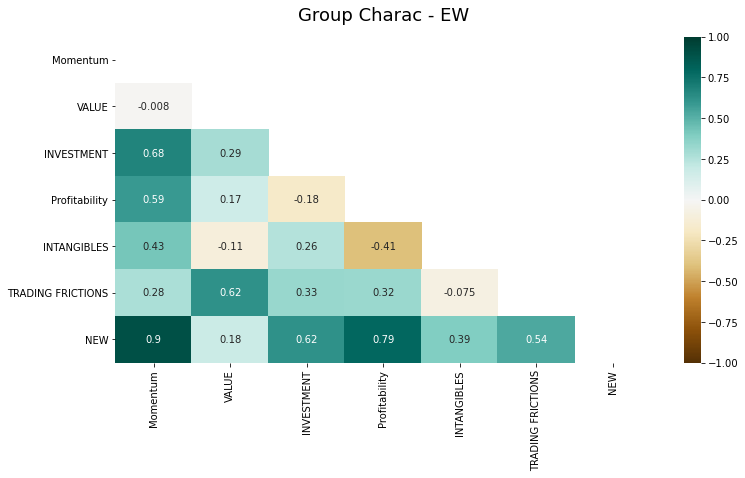

In [21]:
#PLot correlation heatmap
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(group_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(group_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Group Charac - EW', fontdict={'fontsize':18}, pad=16);

In [22]:
"""
The groups are the ones defined in 
Jessen, Kelly and Pedersen's paper
"""
i=0 #For creation of the df

#loop on charac in group
cluster_list =  cluster["cluster"].unique()
for gr in cluster_list:
    charac_list = cluster[cluster["cluster"] == gr].characteristic.unique()
    #Only keep ew in a new dataframe
    temp_df = us_lms[us_lms["characteristic"].isin(charac_list)].groupby(["eom"]).mean()[["ret_ew"]]
    temp_df.columns = [str(gr)]
    #Check for df creation
    if i==0:
        i+=1
        clus_df = temp_df
    else: #merge
        clus_df = clus_df.join(temp_df)

<ipython-input-23-b7a8b7a90db2>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(clus_df.corr(), dtype=np.bool))


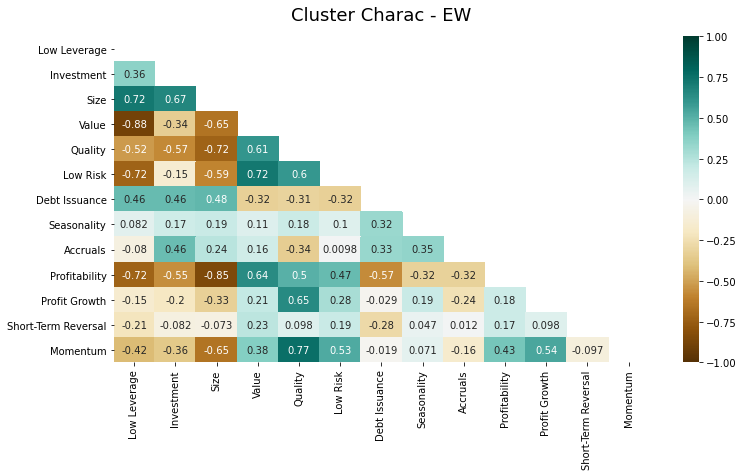

In [23]:
#PLot correlation heatmap
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(clus_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(clus_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Cluster Charac - EW', fontdict={'fontsize':18}, pad=16);